TITANIC SURVIVAL PREDICTION PROJECT
                            -Garima

In [126]:
import pandas as pd
import numpy as np

test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
test_label_data= pd.read_csv('gender_submission.csv')


In [127]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [128]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [130]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [131]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

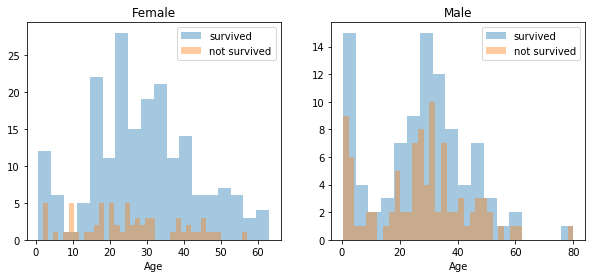

In [133]:
survived='survived'
not_survived='not survived'

fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women= train[train['Sex']=="female"]
men=train[train['Sex']=="male"]

ax=sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label= survived, ax=axes[0], kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label= not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label= survived, ax=axes[1], kde=False)
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=40, label= not_survived, ax=axes[1], kde=False)
ax.legend()
_=ax.set_title('Male')


C:\Users\Gaurav\Anaconda3\envs\irisproject\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Gaurav\Anaconda3\envs\irisproject\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Gaurav\Anaconda3\envs\irisproject\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


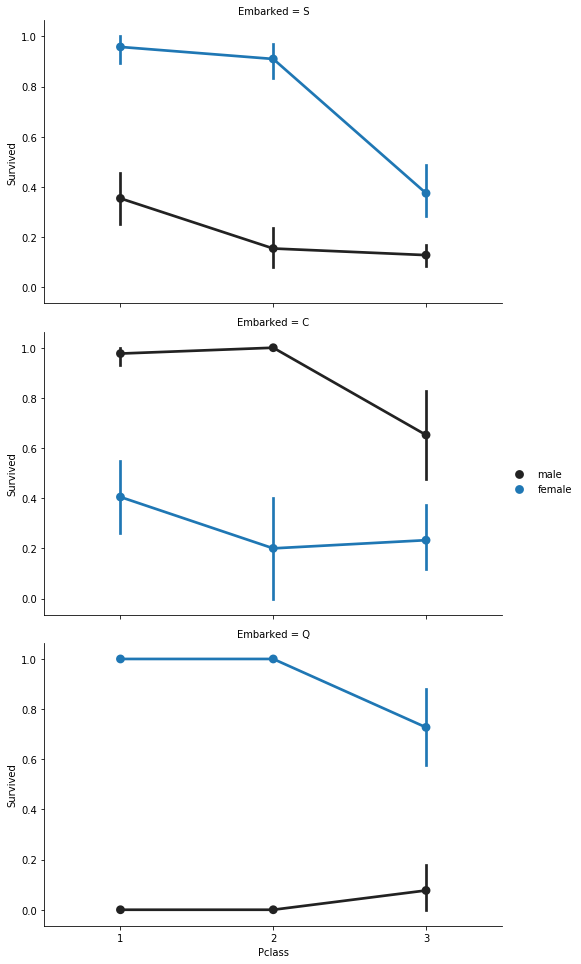

In [134]:
FacetGrid= sns.FacetGrid(train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass','Survived','Sex',palette=None, oder=None,hue_order=None)
FacetGrid.add_legend()

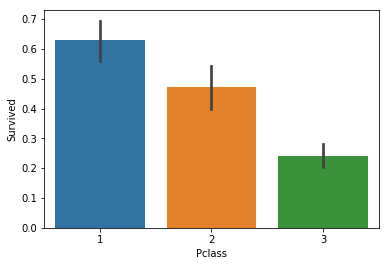

In [135]:
sns.barplot(x='Pclass',y='Survived', data=train)

C:\Users\Gaurav\Anaconda3\envs\irisproject\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


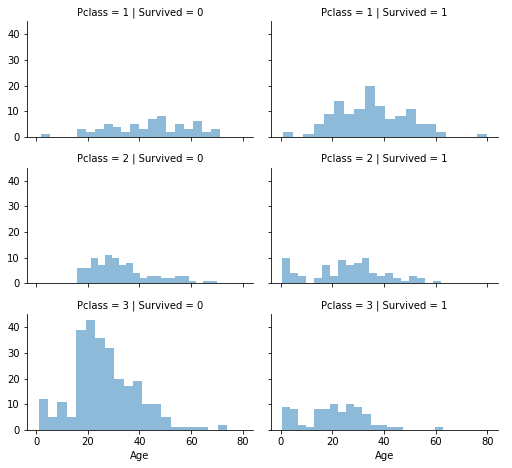

In [136]:
Grid= sns.FacetGrid(train, col='Survived',row='Pclass', size=2.2, aspect=1.6)
Grid.map(plt.hist, 'Age',alpha=.5,bins=20)
Grid.add_legend()

([<matplotlib.axis.XTick at 0x29f29ce5e80>,
 <a list of 3 Text xticklabel objects>)

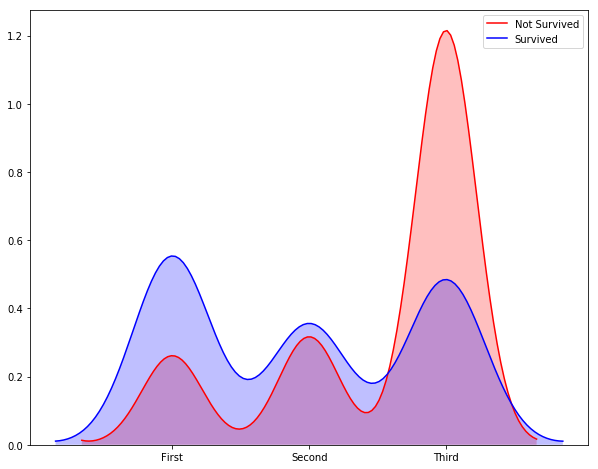

In [137]:
plt.subplots(figsize=(10,8))
sns.kdeplot(train.loc[(train['Survived']==0),'Pclass'],shade=True,color='r',label='Not Survived')
a=sns.kdeplot(train.loc[(train['Survived']==1),'Pclass'],shade=True,color='b',label='Survived')
labels=['First','Second','Third']
plt.xticks(sorted(train.Pclass.unique()),labels)

C:\Users\Gaurav\Anaconda3\envs\irisproject\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Gaurav\Anaconda3\envs\irisproject\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


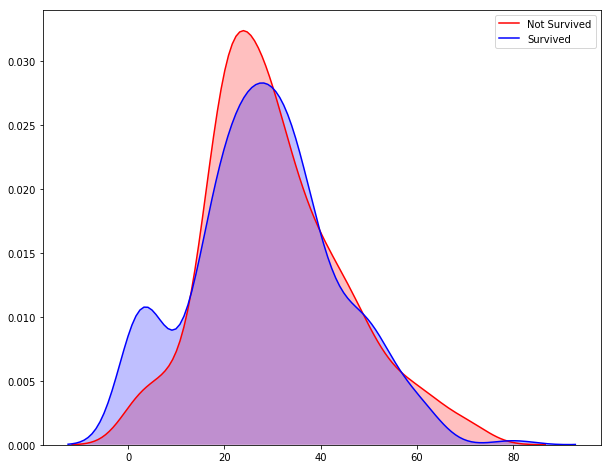

In [138]:
fig,axs=plt.subplots(figsize=(10,8))
sns.kdeplot(train.loc[(train['Survived']==0),'Age'],shade=True,color='r',label='Not Survived')
sns.kdeplot(train.loc[(train['Survived']==1),'Age'],shade=True,color='b',label='Survived')

In [139]:
data=[train,test]
for dataset in data:
  dataset['relatives']=dataset['SibSp']+dataset['Parch']
  dataset.loc[dataset['relatives']>0, 'not_alone']=0
  dataset.loc[dataset['relatives']==0, 'not_alone']=1
  dataset['not_alone']= dataset['not_alone'].astype(int)

Text(0.5, 1.0, 'Correlations among different features of the dataset')

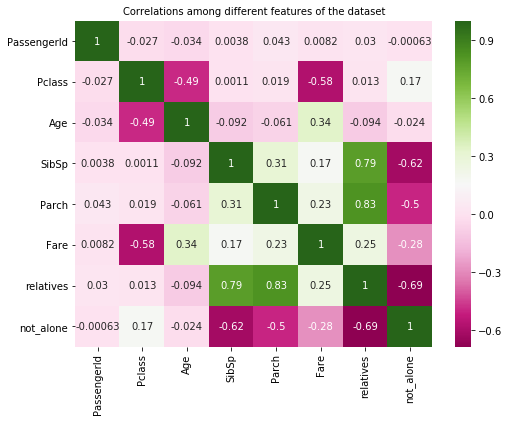

In [140]:
plt.subplots(figsize =(8,6))
sns.heatmap(dataset.corr(),annot=True,cmap="PiYG")
plt.title("Correlations among different features of the dataset",fontsize=10)

In [141]:
data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [142]:
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\Gaurav\Anaconda3\envs\irisproject\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


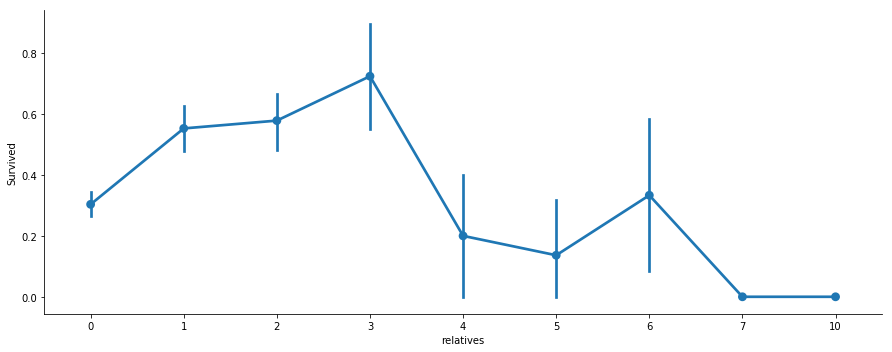

In [143]:
axes=sns.factorplot('relatives','Survived',data=train, aspect=2.5)

In [144]:
train.drop(['PassengerId'], axis = 1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,0


In [145]:
data=[train,test]

for dataset in data:
  mean=train["Age"].mean()
  std=test["Age"].std()
  is_null=dataset["Age"].isnull().sum()
  rand_age=np.random.randint(mean-std, mean+std, size=is_null)
  age_slice=dataset["Age"].copy()
  age_slice[np.isnan(age_slice)]=rand_age
  dataset["Age"]=age_slice
  dataset["Age"]=train["Age"].astype(int)

train["Age"].isnull().sum()

0

In [146]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [147]:
common_value='S'
data=[train,test]
for dataset in data:
  dataset['Embarked']=dataset['Embarked'].fillna(common_value)


In [148]:
data=[train,test]

for dataset in data:
  dataset['Fare']=dataset['Fare'].fillna(0)
  dataset['Fare']=dataset['Fare'].astype(int)

In [149]:
data=[train,test]
titles={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}

for dataset in data:
  dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
  dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
  dataset['Title']=dataset['Title'].replace('Mlle','Miss')
  dataset['Title']=dataset['Title'].replace('Ms','Miss')
  dataset['Title']=dataset['Title'].replace('Mme','Mrs')
  dataset['Title']=dataset['Title'].map(titles)
  dataset['Title']=dataset['Title'].fillna(0)

train=train.drop(['Name'],axis=1)
test=test.drop(['Name'],axis=1)

In [150]:
genders={'male':0,'female':1}
data=[train,test]

for dataset in data:
    dataset['Sex']=dataset['Sex'].map(genders)

In [151]:
train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [152]:
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'], axis=1)

In [153]:
ports={"S":0,"C":1,"Q":2}
data=[train,test]

for dataset in data:
  dataset['Embarked']=dataset['Embarked'].map(ports)


In [154]:
data=[train,test]
for dataset in data:
  dataset['Age']=dataset['Age'].astype(int)
  dataset.loc[dataset['Age']<=11, 'Age']=0
  dataset.loc[(dataset['Age']>11) & (dataset['Age']<=18), 'Age']=1
  dataset.loc[(dataset['Age']>18) & (dataset['Age']<=22), 'Age']=2
  dataset.loc[(dataset['Age']>22) & (dataset['Age']<=27), 'Age']=3
  dataset.loc[(dataset['Age']>27) & (dataset['Age']<=33), 'Age']=4
  dataset.loc[(dataset['Age']>33) & (dataset['Age']<=40), 'Age']=5
  dataset.loc[(dataset['Age']>40) & (dataset['Age']<=66), 'Age']=6
  dataset.loc[dataset['Age']>66, 'Age']=7


In [155]:
data=[train,test]
for dataset in data:
  dataset.loc[dataset['Fare']<=7.91, 'Fare']=0
  dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454), 'Fare']=1
  dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31), 'Fare']=2
  dataset.loc[(dataset['Fare']>31) & (dataset['Fare']<=99), 'Fare']=3
  dataset.loc[(dataset['Fare']>99) & (dataset['Fare']<=250), 'Fare']=4
  dataset.loc[dataset['Fare']>250, 'Fare']=5
  dataset['Fare']=dataset['Fare'].astype(int)


In [156]:
data=[train,test]
for dataset in data:
  dataset['Age_Class']=dataset['Age']*dataset['Pclass']


In [157]:
for dataset in data:
  dataset['Fare_Per_Person']=dataset['Fare']/(dataset['relatives']+1)
  dataset['Fare_Per_Person']=dataset['Fare_Per_Person'].astype(int)

In [158]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'relatives', 'not_alone', 'Title', 'Age_Class',
       'Fare_Per_Person'],
      dtype='object')

In [159]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'relatives', 'not_alone', 'Title',
       'Age_Class', 'Fare_Per_Person'],
      dtype='object')

In [160]:
for dataset in data:
    print(dataset['Sex'])

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64
0      0
1      1
2      0
3      0
4      1
5      0
6      1
7      0
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     0
26     1
27     0
28     0
29     0
      ..
388    0
389    0
390    0
391    1
392    0
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1


LOGISTIC REGRESSION

In [161]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [162]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'relatives', 'not_alone', 'Title',
       'Age_Class', 'Fare_Per_Person'],
      dtype='object')

In [163]:
train.shape

(891, 15)

In [164]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'relatives', 'not_alone', 'Title', 'Age_Class',
       'Fare_Per_Person'],
      dtype='object')

In [165]:
test.shape

(418, 14)

In [166]:
independent_var=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'relatives', 'not_alone',]
data=train[independent_var]
label=train.Fare
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,relatives,not_alone
0,0,3,0,2,1,0,0,1,0
1,1,1,1,5,1,0,3,1,0
2,1,3,1,3,0,0,0,0,1
3,1,1,1,5,1,0,3,1,0
4,0,3,0,5,0,0,1,0,1


In [167]:
x=data.drop('Survived',axis=1)
y=data['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [168]:
regressor=LogisticRegression()
regressor.fit(x_train, y_train)

C:\Users\Gaurav\Anaconda3\envs\irisproject\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [169]:
predictions = regressor.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
acc_Logistic_Regression= round(regressor.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       154
           1       0.78      0.66      0.71       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268



SUPPORT VECTOR MACHINE

In [170]:
from sklearn.svm import SVC,LinearSVC
linear_svc=LinearSVC()
linear_svc.fit(x_train,y_train)
y_pred=linear_svc.predict(x_test)
print(classification_report(y_test, y_pred))
acc_SVM= round(linear_svc.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       154
           1       0.80      0.66      0.72       114

   micro avg       0.78      0.78      0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



C:\Users\Gaurav\Anaconda3\envs\irisproject\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RANDOM FOREST

In [171]:
from sklearn.ensemble import RandomForestClassifier
rand_forest=RandomForestClassifier(n_estimators=100)
rand_forest.fit(x_train,y_train)
y_predict=rand_forest.predict(x_test)
print(classification_report(y_test, y_predict))
acc_random_forest= round(rand_forest.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       154
           1       0.81      0.74      0.77       114

   micro avg       0.81      0.81      0.81       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.81      0.81      0.81       268



K-NEAREST NEIGHBOUR

In [172]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_prediction=knn.predict(x_test)
print(classification_report(y_test, y_prediction))
acc_KNN= round(knn.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       154
           1       0.77      0.75      0.76       114

   micro avg       0.80      0.80      0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



NAIVE BAYES

In [173]:
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(x_train,y_train)
y_pred=gaussian.predict(x_test)
print(classification_report(y_test, y_pred))
acc_gaussian= round(gaussian.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       154
           1       0.72      0.71      0.71       114

   micro avg       0.76      0.76      0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



PERCEPTRON

In [174]:
from sklearn.linear_model import Perceptron
perceptron=Perceptron(max_iter=10)
perceptron.fit(x_train,y_train)
y_pred=perceptron.predict(x_test)
print(classification_report(y_test, y_pred))
acc_perceptron= round(perceptron.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       154
           1       1.00      0.10      0.18       114

   micro avg       0.62      0.62      0.62       268
   macro avg       0.80      0.55      0.46       268
weighted avg       0.77      0.62      0.51       268



C:\Users\Gaurav\Anaconda3\envs\irisproject\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)



STOCHASTIC GRADIENT DECENT

In [175]:
from sklearn.linear_model import SGDClassifier
SGD=SGDClassifier(max_iter=5,tol=None)
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
print(classification_report(y_test, y_pred))
acc_SGD= round(SGD.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.84      0.64      0.73       154
           1       0.63      0.83      0.72       114

   micro avg       0.72      0.72      0.72       268
   macro avg       0.74      0.74      0.72       268
weighted avg       0.75      0.72      0.72       268



C:\Users\Gaurav\Anaconda3\envs\irisproject\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


DECISION TREE

In [176]:
from sklearn.tree import DecisionTreeClassifier
decision=DecisionTreeClassifier()
decision.fit(x_train,y_train)
y_pred=decision.predict(x_test)
print(classification_report(y_test, y_pred))
acc_decision_tree= round(decision.score(x_train,y_train)* 100,2)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       154
           1       0.81      0.68      0.74       114

   micro avg       0.79      0.79      0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



MACHINE LEARNING MODEL EVALUATION

In [177]:
results=pd.DataFrame({
    'Model':['Support Vector Machines','KNN','Logistic Regression','Random Forest','Naive Bayes','Perceptron',
             'Stochastic Gradient Decent','Decision Tree'],
    'Score':[acc_SVM,acc_KNN,acc_Logistic_Regression,acc_random_forest,acc_gaussian,acc_perceptron,
             acc_SGD,acc_decision_tree]
})

result_df=results.sort_values(by='Score',ascending=False)
result_df=result_df.set_index('Score')
result_df

,Model
Score,
89.89,Random Forest
89.89,Decision Tree
86.68,KNN
81.06,Logistic Regression
80.74,Support Vector Machines
78.01,Naive Bayes
70.95,Stochastic Gradient Decent
64.85,Perceptron


The best model for this dataset is RANDOM FOREST 

In [178]:
y_predict=rand_forest.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       154
           1       0.81      0.74      0.77       114

   micro avg       0.81      0.81      0.81       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.81      0.81      0.81       268



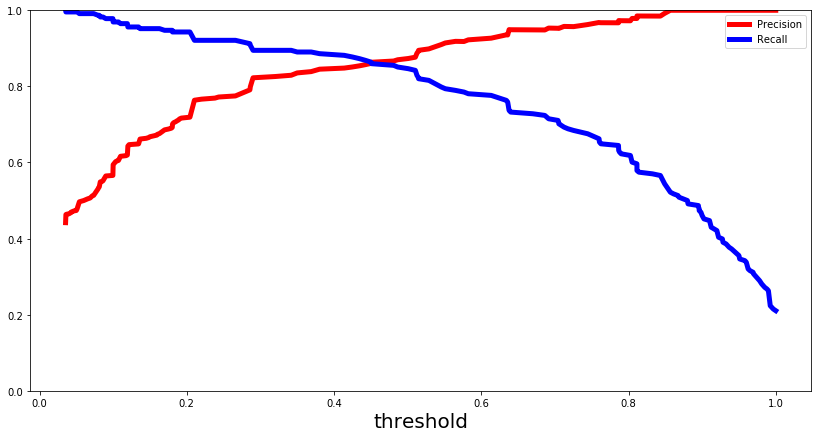

In [179]:
from sklearn.metrics import precision_recall_curve

y_scores=rand_forest.predict_proba(x_train)
y_scores=y_scores[:,1]

precision,recall,threshold=precision_recall_curve(y_train,y_scores)

def plot_precision_recall(precision,recall,threshold):
    plt.plot(threshold,precision[:-1],'r-',label='Precision',linewidth=5)
    plt.plot(threshold,recall[:-1],'b',label='Recall',linewidth=5)
    plt.xlabel('threshold',fontsize=20)
    plt.legend()
    plt.ylim([0,1])

plt.figure(figsize=(14,7))
plot_precision_recall(precision,recall,threshold)